# 10.4 Final Analysis

#### Importin libraries and dataframe - input 1
#### Merging Department name df to main df - input 12
#### Visualizations - input 21
#### Export new dataframe as pickle - input 143 

Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\01_2020_InstacartBasket'

In [3]:
df_main = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_main.pkl'))

In [4]:
pd.options.display.max_rows = None

In [5]:
# Amount of sales for each product ID
xtab_productID_prices = df_main.groupby('product_id').agg({'prices': ['min', 'max', 'max', 'sum']})

In [6]:
xtab_productID_prices.to_clipboard()

In [7]:
# Amount of orders for each product name
orderID_stats_prodname = df_main.groupby('product_name').agg({'order_id': ['min', 'max', 'mean', 'count']})

In [8]:
orderID_stats_prodname.to_clipboard()

In [9]:
# Amount of sales for each department id
dept_sales = df_main.groupby('department_id').agg({'prices': ['min', 'max', 'mean', 'sum', 'count']})

In [10]:
dept_sales.to_clipboard()

In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_time_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  busiest_day                    category
 14  Busiest_days                   category
 15  busiest_period_of_day          category
 16  max_order                      int64   
 17  loyalty_flag             

Importing dataframe of deparment names and merging it to the main dataframe:

In [12]:
# Import department name data 
df_dept = pd.read_csv(os.path.join(path, '02_Data', 'PreparedData', 'departments_wrangled.csv'))

In [13]:
df_dept.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
df_department = df_dept.rename(columns = {'Unnamed: 0' : 'department_id' }, inplace = True)

In [15]:
df_dept.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
# Merge department names onto main dataframe
df_main_dept = df_main.merge(df_dept, on = "department_id", how = 'outer', indicator = True)

In [17]:
df_main_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_time_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  busiest_day                    category
 14  Busiest_days                   category
 15  busiest_period_of_day          category
 16  max_order                      int64   
 17  loyalty_flag             

In [18]:
df_main_dept['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [19]:
# changing 'department' data type to category
df_main_dept['department'] = df_main_dept['department'].astype('category')

In [20]:
df_main_dept['department'].dtype

CategoricalDtype(categories=['alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
                  'bulk', 'canned goods', 'dairy eggs', 'deli',
                  'dry goods pasta', 'frozen', 'household', 'international',
                  'meat seafood', 'missing', 'other', 'pantry',
                  'personal care', 'pets', 'produce', 'snacks'],
, ordered=False)

Visualizations:

Bar chart of sales per department:

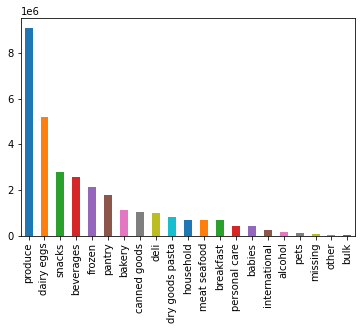

In [21]:
# Create viz for each dept sales
topsales_dept_viz = df_main_dept['department'].value_counts().plot.bar(color = sns.color_palette('tab10'))

In [23]:
topsales_dept_viz.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'top_dept.png'))

In [24]:
# See each department sales by sum agg on prices, grouped by 'department'
dept_sales = df_main_dept.groupby('department').agg({'prices': 'sum'})

In [25]:
dept_sales

,prices
department,
alcohol,1178811.1
babies,3133096.4
bakery,8806886.2
beverages,19758773.9
breakfast,5388030.2
bulk,279212.8
canned goods,7637778.5
dairy eggs,171440306.7
deli,7813188.1


In [26]:
dept_sales.to_clipboard()

Stacked bar chart showing sales within each department, grouped by age-range: 

In [27]:
# Make crosstab of department and age-range 
xtab_age_dept = pd.crosstab(df_main_dept['department'], df_main_dept['profile_age'], dropna = False)

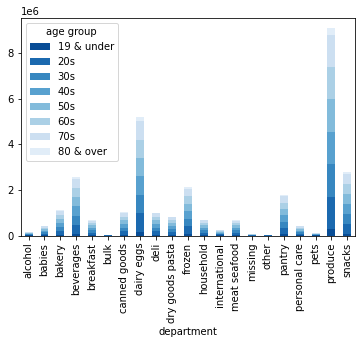

In [29]:
bar_age_dept_A = xtab_age_dept.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'age group', loc = 'upper left')

In [31]:
# Export 2nd viz
bar_age_dept_A.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_dept.png'))

Chart showing distribution of customers by age-range:

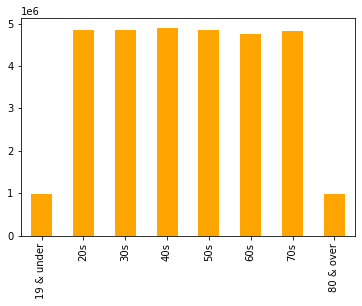

In [32]:
# Make bar chart of total orders by age-range by value count
bar_age_orders = df_main_dept['profile_age'].value_counts().sort_index().plot.bar(color = 'orange')

In [33]:
# Export viz
bar_age_orders.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_age.png'))

Chart showing proportions of orders made within each department by age-range: 

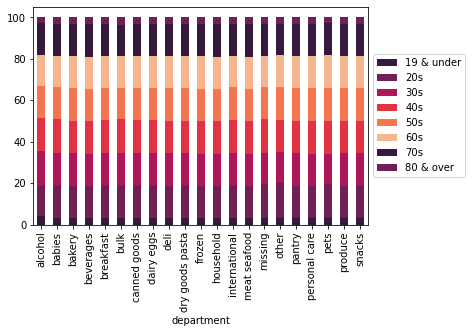

In [34]:
# Make 100% stacked bar chart using crosstab of age-range and department 'xtab_age_dept'
bar_age_dept_100 = xtab_age_dept.apply(lambda r: r/r.sum()*100, axis = 1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rocket'))

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [35]:
bar_age_dept_100.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_age_dept_100.png'))

Bar chart of orders per department, grouped by family-status:

In [36]:
# Make crosstab of family-status and department name
xtab_famstatus_dept = pd.crosstab(df_main_dept['department'], df_main_dept['fam_status'], dropna = False)

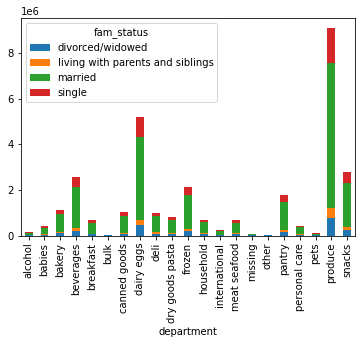

In [37]:
# Create bar chart with crosstab
bar_famstat_dept = xtab_famstatus_dept.sort_index().plot(kind = 'bar', stacked = True)

In [38]:
# Export viz
bar_famstat_dept.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_famstatus_dept.png'))

Pie chart showing top 8 departments:

Text(108.68, 0.5, '')

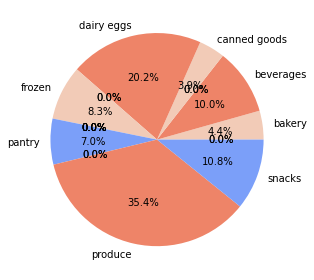

In [70]:
# Make pie chart of just the top 8 departments
pie_department_name = df_top8dept['department'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 4))
plt.tight_layout()
plt.ylabel('')

In [71]:
# Make crosstab and bar chart again
xtab_top8_income = pd.crosstab(df_top8dept['department'], df_top8dept['profile_income'], dropna = False)

Bar chart of tot orders made per income range:

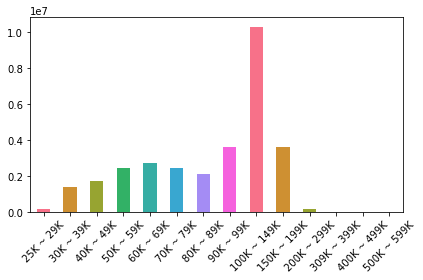

In [74]:
# Index of income-range is manually reordered here using .reindex()
orders_by_income = df_main_dept['profile_income'].value_counts().reindex(['25K ~ 29K', '30K ~ 39K', '40K ~ 49K','50K ~ 59K','60K ~ 69K','70K ~ 79K','80K ~ 89K','90K ~ 99K','100K ~ 149K','150K ~ 199K', '200K ~ 299K', '309K ~ 399K','400K ~ 499K','500K ~ 599K']).plot.bar(color = sns.color_palette('husl', 8))

plt.xticks(rotation = 45, horizontalalignment = 'center')

plt.tight_layout()

In [75]:
# Export viz
orders_by_income.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_income.png'))

Bar chart of total orders made by family status:

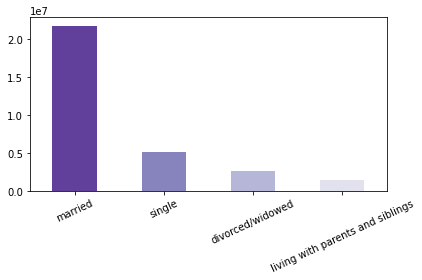

In [76]:
# Make chart of total orders made by family-status
orders_by_famstatus = df_main_dept['fam_status'].value_counts().plot.bar(color = sns.color_palette('Purples_r', 4))

plt.xticks(rotation = 25, horizontalalignment = 'center')

plt.tight_layout()

In [77]:
# Export viz
orders_by_famstatus.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_famstatus.png'))

Chart showing busiest hours of the day:

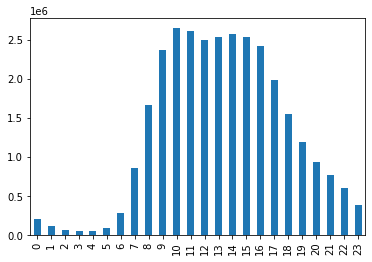

In [78]:
# Make bar chart of busiest hours of the day
orders_by_hour = df_main_dept['order_time_of_day'].value_counts().sort_index().plot.bar()

In [79]:
# Export viz
orders_by_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_hour.png'))

Chart showing busiest days of the week:

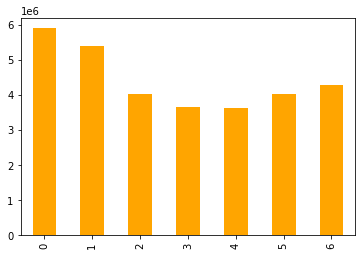

In [80]:
# Make bar chart of busiest days of week
orders_by_dow = df_main_dept['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'orange')

In [81]:
# Export viz
orders_by_dow.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'orders_by_dow.png'))

Line chart of total sales by the hour of day:

In [82]:
# Make line chart of sales (sum of 'prices') per hour; first make object of sum of prices grouped by order time
sales_by_hour = df_main_dept.groupby('order_time_of_day').agg({'prices': ['sum']})

Text(0, 0.5, 'total sales')

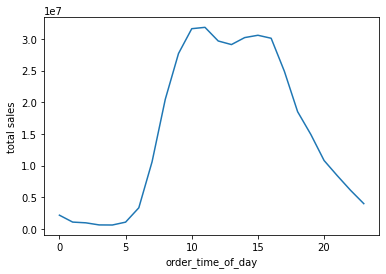

In [83]:
# Make line chart
line_chart_sales_by_hour = sales_by_hour.plot.line(legend = False)
plt.ylabel('total sales')

Line chart of average prices of items purchased by the hour of the day: 

In [84]:
avgprice_by_hour = df_main_dept.groupby('order_time_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'avg price')

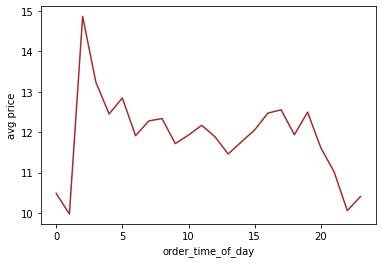

In [85]:
line_chart_avgprice_by_hour = avgprice_by_hour.plot.line(legend = False, color = 'brown')
plt.ylabel('avg price')

In [86]:
# Export both viz
line_chart_avgprice_by_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_chart_avgprice_by_hour.png'))

In [87]:
line_chart_sales_by_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_chart_sales_by_hour.png'))

Stacked bar chart of sales made per day-of-the-week, grouped by parental status:

In [88]:
# Make stacked bar chart of sales made per day of week, grouped by parental-status
xtab_dow_parental = pd.crosstab(df_main_dept['orders_day_of_week'], df_main_dept['profile_parental'], dropna = False)

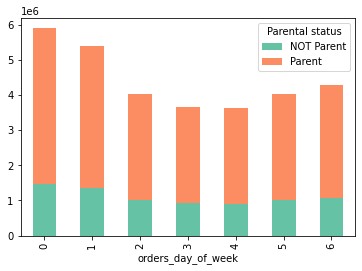

In [89]:
bar_dow_parental = xtab_dow_parental.plot.bar(stacked = True, color = sns.color_palette('Set2'))

plt.legend(title = 'Parental status')

In [90]:
# Export viz
bar_dow_parental.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_dow_parental.png'))

Stacked bar chart showing the distribution of age-ranges, grouped by spender type: 

In [91]:
# Make bar chart of distribution of age ranges, separated by spending flag
xtab_age_spendstyle = pd.crosstab(df_main_dept['profile_age'], df_main_dept['spender_type_flag'], dropna = False)

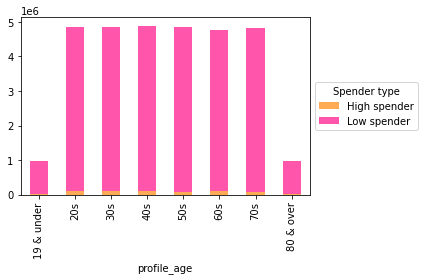

In [92]:
bar_age_spendstyle = xtab_age_spendstyle.plot.bar(stacked = True, color = sns.color_palette('spring_r', 2))

plt.legend(title = 'Spender type', loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.tight_layout()

In [93]:
# Export viz
bar_age_spendstyle.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_age_spendstyle.png'))

Stacked bar chart showing the distributio of number-of-dependants, grouped by spender type: 

In [94]:
#  Make bar chart of distribution of profile of number of dependants, separated by spending flag
xtab_ndep_spendstyle = pd.crosstab(df_main_dept['n_dependants'], df_main_dept['spender_type_flag'], dropna = False)

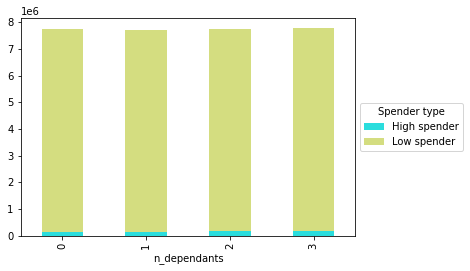

In [95]:
bar_ndep_spendstyle = xtab_ndep_spendstyle.plot.bar(stacked = True, color = sns.color_palette('rainbow', 2))

plt.legend(title = 'Spender type', loc = 'center left', bbox_to_anchor = (1, 0.5))

In [96]:
# Export viz
bar_ndep_spendstyle.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_ndep_spendstyle.png'))

Bar chart showing distribution of customer base by region: 

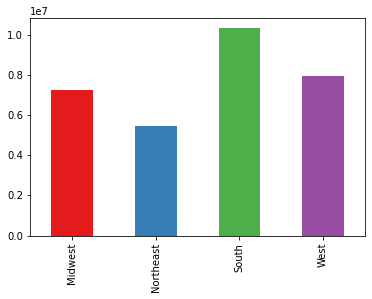

In [97]:
# Make bar chart of customer distribution by region
bar_region = df_main_dept['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('Set1',4))

In [98]:
# Export viz
bar_region.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_region.png'))

Bar chart of distribution of customers in each age_range, with stacked distinction of region:

In [100]:
xtab_age_region = pd.crosstab(df_main_dept['profile_age'], df_main_dept['region'], dropna = False)

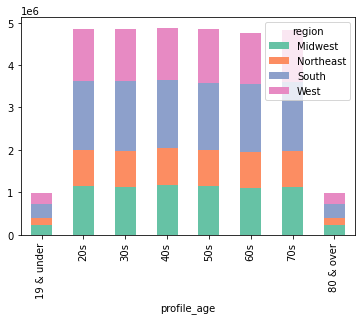

In [101]:
bar_age_region = xtab_age_region.plot.bar(stacked = True, color = sns.color_palette('Set2'))

In [102]:
# Export viz
bar_age_region.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_age_region.png'))

Stacked bar chart showing distribution of customers in each income-range, grouped by region: 

In [103]:
# Make bar chart of distribution of customer in income-range, with stacked distinction of region
xtab_income_region = pd.crosstab(df_main_dept['profile_income'], df_main_dept['region'], dropna = False)

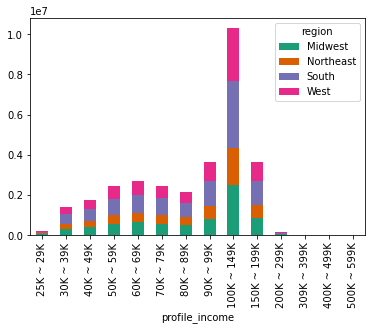

In [104]:
bar_income_region = xtab_income_region.reindex(['25K ~ 29K', '30K ~ 39K', '40K ~ 49K','50K ~ 59K','60K ~ 69K','70K ~ 79K','80K ~ 89K','90K ~ 99K','100K ~ 149K','150K ~ 199K', '200K ~ 299K', '309K ~ 399K','400K ~ 499K','500K ~ 599K']).plot.bar(stacked = True, color = sns.color_palette('Dark2', 4))

In [105]:
# Export viz
bar_income_region.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_income_region.png'))

Pie chart showing the proportions of customers based on loyalty:

In [106]:
# Make pie chart of proportion of loyal customers using value_counts()

Text(108.68, 0.5, ' ')

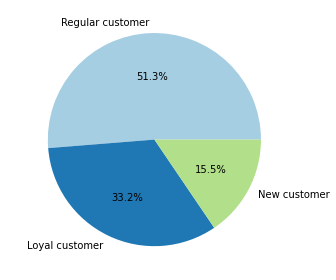

In [107]:
pie_loyalty = df_main_dept['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Paired', 3))
plt.tight_layout()
plt.ylabel(' ')

In [108]:
# Export Viz
pie_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'pie_loyalty.png'))

Stacked bar chart showing the distribution of customers by loyalty, grouped by spender type: 

In [109]:
# Make bar chart of loyalty-types customers and spending style (xtab first)
xtab_loyalty_spendtype = pd.crosstab(df_main_dept['loyalty_flag'], df_main_dept['spender_type_flag'], dropna = False)

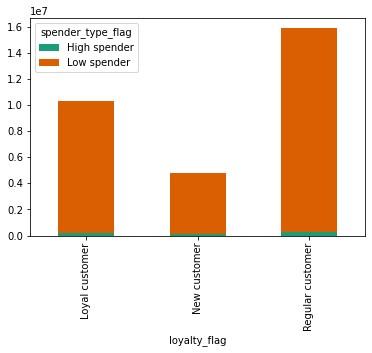

In [110]:
bar_loyalty_spendtype = xtab_loyalty_spendtype.plot.bar(stacked = True, color = sns.color_palette('Dark2'))

In [111]:
# Export viz
bar_loyalty_spendtype.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_loyalty_spendtype.png'))

Stacked bar chart of gender distribution, grouped by spender types: 

In [112]:
# Make bar chart of gender and frequency-flag
xtab_gender_frequency = pd.crosstab(df_main_dept['gender'], df_main_dept['customer_frequency_flag'], dropna = False)

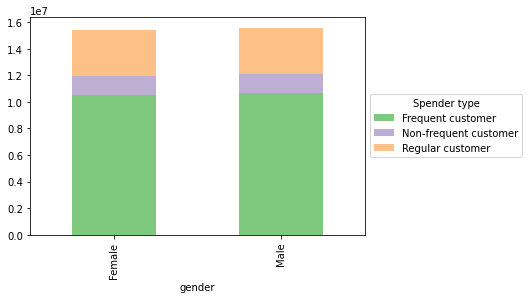

In [113]:
bar_gender_freq = xtab_gender_frequency.plot.bar(stacked = True, color = sns.color_palette('Accent'))

plt.legend(title = 'Spender type', loc = 'center left', bbox_to_anchor = (1, 0.5))

In [114]:
# Export viz
bar_gender_freq.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_gender_freq.png'))

Stacked bar chart showing distribution of spender types, grouped by age ranges:

In [115]:
# Spending flag and age-range bar chart
xtab_spendertype_age = pd.crosstab(df_main_dept['spender_type_flag'], df_main_dept['profile_age'], dropna = False)

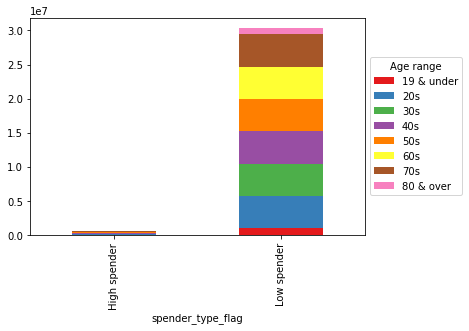

In [116]:
bar_spender_age = xtab_spendertype_age.plot.bar(stacked = True, color = sns.color_palette('Set1'))

plt.legend(title = 'Age range', loc = 'center left', bbox_to_anchor = (1, 0.5))

In [117]:
# Export viz
bar_spender_age.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_spender_age.png'))

Stacked bar chart showing distribution by age-range, grouped by family-status: 

In [118]:
# Bar chart of age-range distribution, stacked by family-status
xtab_age_famstatus = pd.crosstab(df_main_dept['profile_age'], df_main_dept['fam_status'], dropna = False)

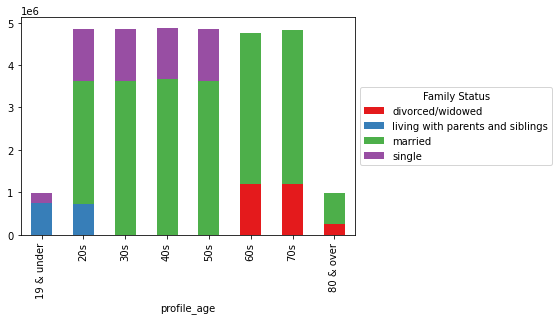

In [119]:
bar_age_famstatus_a = xtab_age_famstatus.plot.bar(stacked = True, color = sns.color_palette('Set1'))

plt.legend(title = 'Family Status', loc = 'center left', bbox_to_anchor = (1, 0.5))

Creating the same chart as above without stacking:

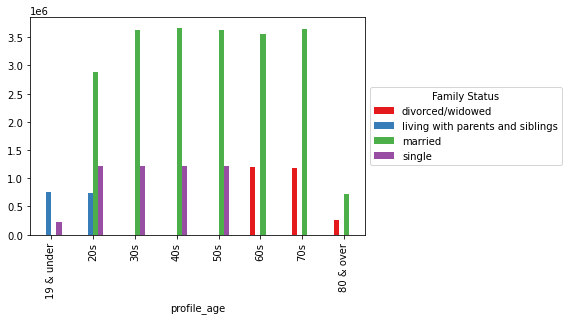

In [120]:
# Same bar chart WITHOUT stacking
bar_age_famstatus_b = xtab_age_famstatus.plot.bar(color = sns.color_palette('Set1'))

plt.legend(title = 'Family Status', loc = 'center left', bbox_to_anchor = (1, 0.5))

In [121]:
# This chart better conveys the information, export viz
bar_age_famstatus_a.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_age_famstatus_a.png'))

Bar chart shoing distribution by income-range, grouped by customer order frequency: 

In [125]:
# bar chart of income-range distribution, stacked by frequency-flag
xtab_income_freq = pd.crosstab(df_main_dept['profile_income'], df_main_dept['customer_frequency_flag'], dropna = False)

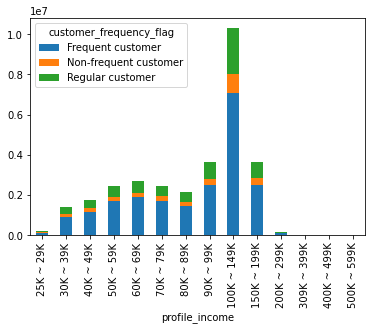

In [126]:
bar_income_freq_a =xtab_income_freq.reindex(['25K ~ 29K', '30K ~ 39K', '40K ~ 49K','50K ~ 59K','60K ~ 69K','70K ~ 79K','80K ~ 89K','90K ~ 99K','100K ~ 149K','150K ~ 199K', '200K ~ 299K', '309K ~ 399K','400K ~ 499K','500K ~ 599K']).plot.bar(stacked = True)

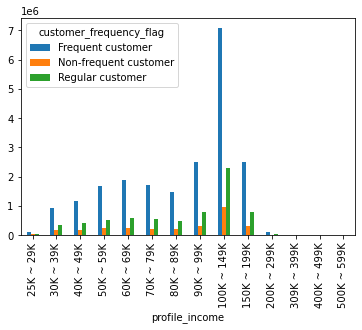

In [127]:
# same chart but not stacked
bar_income_freq_b =xtab_income_freq.reindex(['25K ~ 29K', '30K ~ 39K', '40K ~ 49K','50K ~ 59K','60K ~ 69K','70K ~ 79K','80K ~ 89K','90K ~ 99K','100K ~ 149K','150K ~ 199K', '200K ~ 299K', '309K ~ 399K','400K ~ 499K','500K ~ 599K']).plot.bar()

In [128]:
# i like both, export both viz
bar_income_freq_a.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_income_freq_a.png'))

In [129]:
bar_income_freq_b.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_income_freq_b.png'))

Bar chart showing average income of by region:

In [133]:
# Trying a mean income grouped by region
avgincome_region = df_main_dept.groupby('region').agg({'income' : ['mean']})

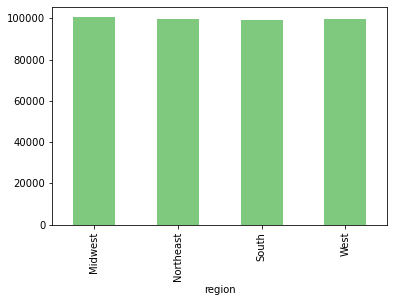

In [134]:
bar_avgincome_region = avgincome_region.plot.bar(color = sns.color_palette('Accent', 4))

plt.legend('', frameon = False)

In [135]:
# Export Viz
bar_avgincome_region.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_aveincome_region.png'))

Chart showing distribution of customers by parental status, grouped by customer order frequency:

In [136]:
# Make bar of distribution of parental status, crosstabbed with 'frequency flag'
xtab_parent_freq = pd.crosstab(df_main_dept['profile_parental'], df_main_dept['customer_frequency_flag'], dropna = False)

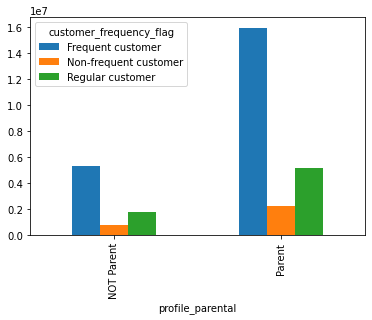

In [137]:
bar_parent_freq = xtab_parent_freq.plot.bar()

In [138]:
# Export viz
bar_parent_freq.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_parent_freq.png'))

Chart showing distribution of customers by region, grouped by loyalty:

In [139]:
# Make bar chart of distribution of customers by region, distinction of 'loyalty'
xtab_region_loyalty = pd.crosstab(df_main_dept['region'], df_main_dept['loyalty_flag'], dropna = False)

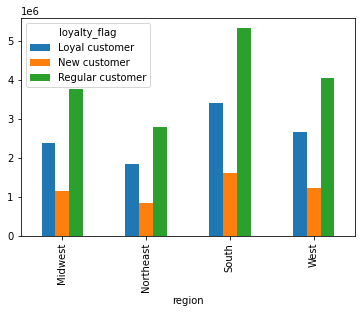

In [140]:
bar_region_loyalty = xtab_region_loyalty.plot.bar()

In [141]:
# Export viz
bar_region_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_region_loyalty.png'))

Exporting new dataframe as pickle

In [143]:
df_main_dept.to_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_main_dept.pkl'))